# TRABALHO 1

In [1]:
import os
import json
import csv
import pandas as pd
import os.path
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick

In [2]:
path = os.getcwd()
path_xlsx = path + '/'

print(path_xlsx)
data = pd.read_excel(f"{path_xlsx}/dataframe1.xlsx")
df_treino = data.dropna(subset=['label'])
df_treino = df_treino.drop('label2', axis=1)
df_all = data.drop('label2', axis=1)


c:\Users\Dell\Desktop\git\classification-ti26s/


# DATABASE

In [3]:
df_all

,label,id,key,text,text_len,context_name,context_description,context_annotations,impression_count,like_count,retweet_count,reply_count,quote_count,has_link,has_emoji,lang,created_at,edit_history_tweet_ids,referenced_tweets
0,1.0,1645735418938149888,aleijada,iala essas piranha puta vadia safada vagabund...,280,NaN,NaN,NaN,22,0,0,0,0,False,True,pt,2023-04-11T10:27:54.000Z,['1645735418938155010'],"[{'type': 'quoted', 'id': '1645517900722176009'}]"
1,1.0,1645735092667529984,aleijada,se eu presenciar isso vou presa pq ela ia fi...,104,NaN,NaN,NaN,12,0,0,0,0,False,False,pt,2023-04-11T10:26:37.000Z,['1645735092667531266'],"[{'type': 'replied_to', 'id': '164560528129903..."
2,0.0,1645724510304320000,aleijada,se so piora vai ficar logo e aleijada,53,NaN,NaN,NaN,7,0,0,0,0,False,False,pt,2023-04-11T09:44:33.000Z,['1645724510304325632'],"[{'type': 'replied_to', 'id': '164571619666100..."
3,0.0,1645655628650629888,aleijada,guria eu tambem tenho certeza que sou toda er...,99,NaN,NaN,NaN,24,0,0,1,0,False,False,pt,2023-04-11T05:10:51.000Z,['1645655628650631169'],"[{'type': 'replied_to', 'id': '164564212352011..."
4,0.0,1645615543670510080,aleijada,limpe vc n e aleijada,38,NaN,NaN,NaN,24,0,0,1,0,False,False,pt,2023-04-11T02:31:34.000Z,['1645615543670517760'],"[{'type': 'replied_to', 'id': '164561498806783..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,0.0,1647536575209769984,viado,oh o viado,19,NaN,NaN,NaN,29,0,0,0,0,False,False,pt,2023-04-16T09:45:03.000Z,['1647536575209779200'],"[{'type': 'replied_to', 'id': '164739527487091..."
2793,NaN,1647536396167419904,viado,ce e viado ne vei,38,NaN,NaN,NaN,313,0,0,1,0,False,True,pt,2023-04-16T09:44:21.000Z,['1647536396167421956'],"[{'type': 'replied_to', 'id': '164739356074703..."
2794,NaN,1647534413880630016,viado,hoje em dia esses viado mostra tudo menos as p...,52,K-pop,K-Pop,NaN,22,0,0,0,0,False,False,pt,2023-04-16T09:36:28.000Z,['1647534413880631298'],"[{'type': 'quoted', 'id': '1647335150768869382'}]"
2795,0.0,1647534410210629888,viado,que esforco pra nao dizer que e viado,54,NaN,NaN,NaN,10,1,0,0,0,False,False,pt,2023-04-16T09:36:27.000Z,['1647534410210631682'],"[{'type': 'replied_to', 'id': '164724939306458..."


In [4]:
df_treino

,label,id,key,text,text_len,context_name,context_description,context_annotations,impression_count,like_count,retweet_count,reply_count,quote_count,has_link,has_emoji,lang,created_at,edit_history_tweet_ids,referenced_tweets
0,1.0,1645735418938149888,aleijada,iala essas piranha puta vadia safada vagabund...,280,NaN,NaN,NaN,22,0,0,0,0,False,True,pt,2023-04-11T10:27:54.000Z,['1645735418938155010'],"[{'type': 'quoted', 'id': '1645517900722176009'}]"
1,1.0,1645735092667529984,aleijada,se eu presenciar isso vou presa pq ela ia fi...,104,NaN,NaN,NaN,12,0,0,0,0,False,False,pt,2023-04-11T10:26:37.000Z,['1645735092667531266'],"[{'type': 'replied_to', 'id': '164560528129903..."
2,0.0,1645724510304320000,aleijada,se so piora vai ficar logo e aleijada,53,NaN,NaN,NaN,7,0,0,0,0,False,False,pt,2023-04-11T09:44:33.000Z,['1645724510304325632'],"[{'type': 'replied_to', 'id': '164571619666100..."
3,0.0,1645655628650629888,aleijada,guria eu tambem tenho certeza que sou toda er...,99,NaN,NaN,NaN,24,0,0,1,0,False,False,pt,2023-04-11T05:10:51.000Z,['1645655628650631169'],"[{'type': 'replied_to', 'id': '164564212352011..."
4,0.0,1645615543670510080,aleijada,limpe vc n e aleijada,38,NaN,NaN,NaN,24,0,0,1,0,False,False,pt,2023-04-11T02:31:34.000Z,['1645615543670517760'],"[{'type': 'replied_to', 'id': '164561498806783..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,0.0,1647537299167620096,viado,viu viado,49,NaN,NaN,NaN,31,0,0,0,0,False,False,pt,2023-04-16T09:47:56.000Z,['1647537299167625218'],"[{'type': 'replied_to', 'id': '164669465402327..."
2790,1.0,1647537082045189888,viado,bom q seja preso seu viado,38,NaN,NaN,NaN,10,0,0,1,0,False,False,pt,2023-04-16T09:47:04.000Z,['1647537082045198336'],"[{'type': 'replied_to', 'id': '164739044381712..."
2792,0.0,1647536575209769984,viado,oh o viado,19,NaN,NaN,NaN,29,0,0,0,0,False,False,pt,2023-04-16T09:45:03.000Z,['1647536575209779200'],"[{'type': 'replied_to', 'id': '164739527487091..."
2795,0.0,1647534410210629888,viado,que esforco pra nao dizer que e viado,54,NaN,NaN,NaN,10,1,0,0,0,False,False,pt,2023-04-16T09:36:27.000Z,['1647534410210631682'],"[{'type': 'replied_to', 'id': '164724939306458..."


## DESCRIBE

### Dataframe inteiro

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   label                   1317 non-null   float64
 1   id                      2797 non-null   int64  
 2   key                     2797 non-null   object 
 3   text                    2797 non-null   object 
 4   text_len                2797 non-null   int64  
 5   context_name            818 non-null    object 
 6   context_description     743 non-null    object 
 7   context_annotations     10 non-null     object 
 8   impression_count        2797 non-null   int64  
 9   like_count              2797 non-null   int64  
 10  retweet_count           2797 non-null   int64  
 11  reply_count             2797 non-null   int64  
 12  quote_count             2797 non-null   int64  
 13  has_link                2797 non-null   bool   
 14  has_emoji               2797 non-null   

In [10]:
df_all.isnull().sum()

label                     1480
id                           0
key                          0
text                         0
text_len                     0
context_name              1979
context_description       2054
context_annotations       2787
impression_count             0
like_count                   0
retweet_count                0
reply_count                  0
quote_count                  0
has_link                     0
has_emoji                    0
lang                         0
created_at                   0
edit_history_tweet_ids       0
referenced_tweets           42
dtype: int64

![describe2](null-full.png)

Há 3 variáveis que há grandes quantidades de registros nulos:
- context_name
- context_description
- context_count
Há 1 variável que possui apenas 42 registros nulos:
- referenced_tweets

Para o propósito do trabalho, preencher essas variáveis não vale a pena.
Essas variáveis contém o contexto no qual o tweet está inserido, por exemplo:
- Política
- Música
- Televisão
- Religião

A API do Twitter na qual coletamos essas informações, possui um sistema muito ruim para registrar esses contextos, alguns nem estão corretos. O que coletamos é suficiente para nos darmos uma ideia de possíveis contextos onde tweets preconceituosos estão inseridos.
Enriquecer essa variável exigiria modelos de aprendizado de máquina, para analisar o texto e identificar qual o assunto e o contexto que ele se encaixa. 
A ideia do trabalho é fazer uma classificação se o texto tem preconceito ou não, utilizando aprendizado de máquina supervisionado.

In [7]:
df_all.describe()

,label,id,text_len,impression_count,like_count,retweet_count,reply_count,quote_count
count,1317.000000,2.797000e+03,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000
mean,0.293090,1.646232e+18,112.881659,117.629961,1.680729,4.110118,0.402574,0.021809
std,0.455352,1.162894e+15,79.925143,742.578680,10.723970,58.173769,0.885566,0.220279
min,0.000000,1.642143e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.645747e+18,51.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.646375e+18,84.000000,22.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.647371e+18,158.000000,61.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.647572e+18,369.000000,27323.000000,237.000000,1479.000000,24.000000,6.000000


![describe](describe-full4.png)


### Dataframe de treino

In [8]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 2796
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   label                   1317 non-null   float64
 1   id                      1317 non-null   int64  
 2   key                     1317 non-null   object 
 3   text                    1317 non-null   object 
 4   text_len                1317 non-null   int64  
 5   context_name            332 non-null    object 
 6   context_description     301 non-null    object 
 7   context_annotations     5 non-null      object 
 8   impression_count        1317 non-null   int64  
 9   like_count              1317 non-null   int64  
 10  retweet_count           1317 non-null   int64  
 11  reply_count             1317 non-null   int64  
 12  quote_count             1317 non-null   int64  
 13  has_link                1317 non-null   bool   
 14  has_emoji               1317 non-null   

In [11]:
df_treino.isnull().sum()

label                        0
id                           0
key                          0
text                         0
text_len                     0
context_name               985
context_description       1016
context_annotations       1312
impression_count             0
like_count                   0
retweet_count                0
reply_count                  0
quote_count                  0
has_link                     0
has_emoji                    0
lang                         0
created_at                   0
edit_history_tweet_ids       0
referenced_tweets           13
dtype: int64

![describe](null-treino.png)

In [9]:
df_treino.describe()

,label,id,text_len,impression_count,like_count,retweet_count,reply_count,quote_count
count,1317.000000,1.317000e+03,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,0.293090,1.646241e+18,88.635535,127.891420,1.670463,1.084282,0.387244,0.016705
std,0.455352,1.072663e+15,65.854767,864.812804,11.245769,26.687537,0.985652,0.159864
min,0.000000,1.642210e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.645743e+18,43.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.646363e+18,66.000000,23.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.647279e+18,109.000000,60.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.647571e+18,322.000000,27323.000000,237.000000,812.000000,24.000000,4.000000


![describe](describe-treino.png)


---------

- label (bool): classificação (0/1). 1 para texto preconceituoso. 0 para texto não preconceituoso
- id (id): identificador único do tweet
- key (text): palavra chave utilizada na busca
- text (text): texto do tweet
- text_len (numeric): tamanho do texto do tweet, quantidade de caracteres
- context_name (text): contexto que o tweet se encaixa
- context_description (text): descrição do contexto que o tweet se encaixa
- context_annotations (text): demais anotações do contexto que o tweet se encaixa
- impression_count (numeric): número de vizualizações(impressões) que o tweet tinha no momento da coleta
- like_count (numeric): número de curtidas que o tweet tinha no momento da coleta
- retweet_count (numeric): número de compartilhamentos que o tweet tinha no momento da coleta
- reply_count (numeric): número de respostas que o tweet tinha no momento da coleta
- quote_count (numeric): número de menções que o tweet tinha no momento da coleta
- has_link (bool): Possui link no texto ou não. 1 para texto com link. 0 para texto sem link.
- has_emoji (bool): Possui emoji no texto ou não. 1 para texto com emoji. 0 para texto sem emoji.
- lang (text): Idioma do tweet. Todos serão 'pt' pois já foi filtrado.
- created_at (date): Data que o tweet foi postado.
- edit_history_tweet_ids (list): Lista de ids de edição dos tweets.
- referenced_tweets (list): Lista de referências do tweet. 



---------

# Análise

### Matriz de correlação entre as variáveis

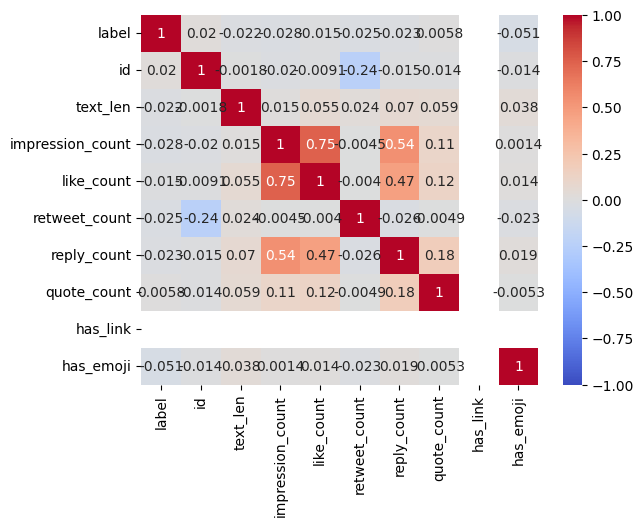

In [5]:
# Calculando a matriz de correlação
matriz_corr = df_all.corr(numeric_only=True)

# Plotando o mapa de calor com seaborn
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()


As variáveis numéricas que mais tem correlação são as contagens de impressão, like, reply. É comum que tweets que possuem um maior alcance (impression) costumam possuir maior engajamento, como um número meio de likes e reply.

### Distribuições das Classes

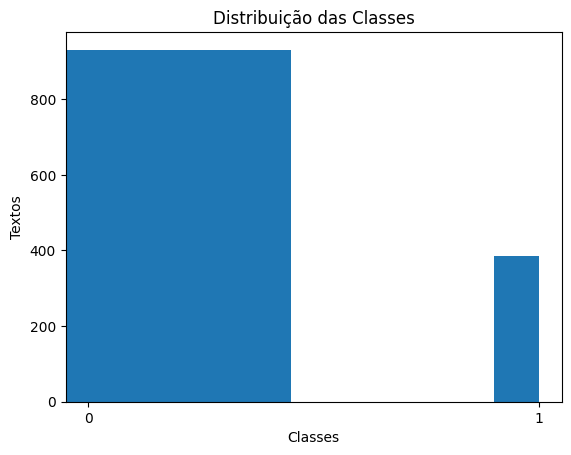

In [49]:
plt.hist(df_treino['label'], bins=[-0.05, 0.95, 1.05], align='left')
plt.xticks([0, 1])
plt.xlim([-0.05, 1.05])
plt.title('Distribuição das Classes')
plt.ylabel('Textos')
plt.xlabel('Classes')
plt.show()


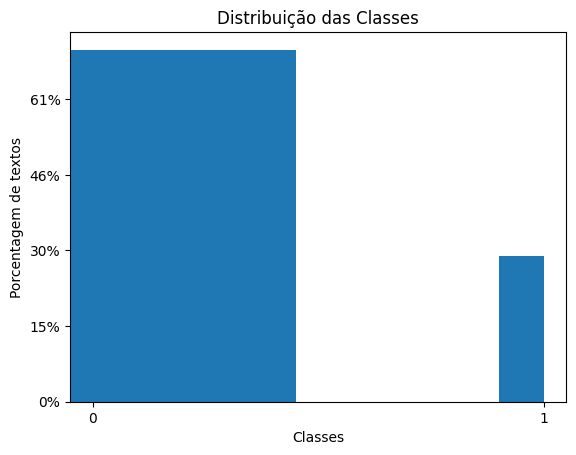

In [51]:
plt.hist(df_treino['label'], bins=[-0.05, 0.95, 1.05], align='left')
plt.xticks([0, 1])
plt.xlim([-0.05, 1.05])
plt.title('Distribuição das Classes')
plt.ylabel('Porcentagem de textos')
plt.xlabel('Classes')

fmt = '%.0f%%' # Define o formato da porcentagem
yticks = mtick.PercentFormatter(xmax=len(df_treino)) # Cria o formatter dos ticks em percentagem
plt.gca().yaxis.set_major_formatter(yticks) # Define o formatter no objeto Axes atual

plt.show()


### PCA